In [ ]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt




In [ ]:
# Step 4: Load and Preprocess Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()



170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
import numpy as np

In [ ]:
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)
print("Number of classes:", len(np.unique(train_labels)))

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10


In [ ]:
cifar_10 = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [ ]:

cifar10_class_names = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}

In [ ]:


# Assuming train_labels is a numpy array containing the class labels for the training data
unique_train_classes, train_counts = np.unique(train_labels, return_counts=True)

# Print the number of images per class with class names
print("Number of images per class in the training dataset:")
for class_index, count in zip(unique_train_classes, train_counts):
    class_name = cifar10_class_names[class_index]
    print(f"Class {class_index} ({class_name}): {count} images")



Number of images per class in the training dataset:
Class 0 (Airplane): 5000 images
Class 1 (Automobile): 5000 images
Class 2 (Bird): 5000 images
Class 3 (Cat): 5000 images
Class 4 (Deer): 5000 images
Class 5 (Dog): 5000 images
Class 6 (Frog): 5000 images
Class 7 (Horse): 5000 images
Class 8 (Ship): 5000 images
Class 9 (Truck): 5000 images


In [ ]:
unique_test_classes, test_counts = np.unique(test_labels, return_counts=True)

print("\nNumber of images per class in the test dataset:")
for class_index, count in zip(unique_test_classes, test_counts):
    class_name = cifar10_class_names[class_index]
    print(f"Class {class_index} ({class_name}): {count} images")


Number of images per class in the test dataset:
Class 0 (Airplane): 1000 images
Class 1 (Automobile): 1000 images
Class 2 (Bird): 1000 images
Class 3 (Cat): 1000 images
Class 4 (Deer): 1000 images
Class 5 (Dog): 1000 images
Class 6 (Frog): 1000 images
Class 7 (Horse): 1000 images
Class 8 (Ship): 1000 images
Class 9 (Truck): 1000 images


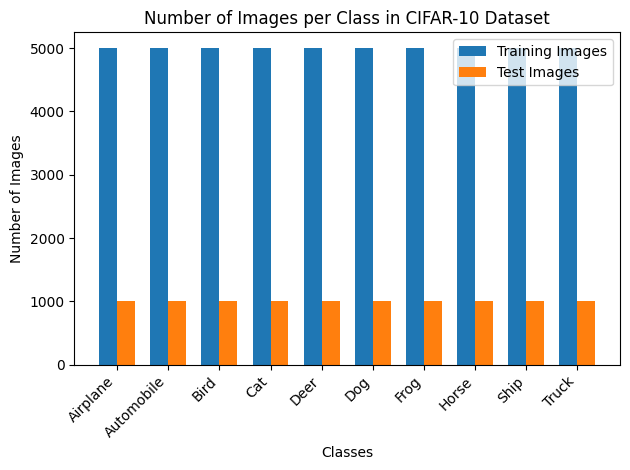

In [ ]:
# Create a list of class names in the order of unique classes
class_names_ordered = [cifar10_class_names[class_index] for class_index in unique_train_classes]

# Set up the bar graph
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars
index = np.arange(len(cifar10_class_names))
# Create the bars for training and test counts
bar1 = ax.bar(index, train_counts, bar_width, label='Training Images')
bar2 = ax.bar(index + bar_width, test_counts, bar_width, label='Test Images')

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Images')
ax.set_title('Number of Images per Class in CIFAR-10 Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(class_names_ordered, rotation=45, ha="right")
ax.legend()

# Show the bar graph
plt.tight_layout()
plt.show()

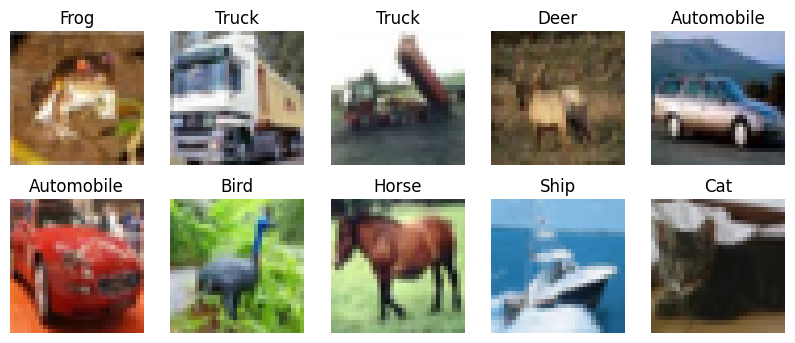

In [ ]:
import matplotlib.pyplot as plt



# Function to plot images
def plot_images(images, labels, classes, n=10):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.title(classes[labels[i][0]])
        plt.axis('off')
    plt.show()

# Plot some training images
plot_images(train_images, train_labels, cifar_10)


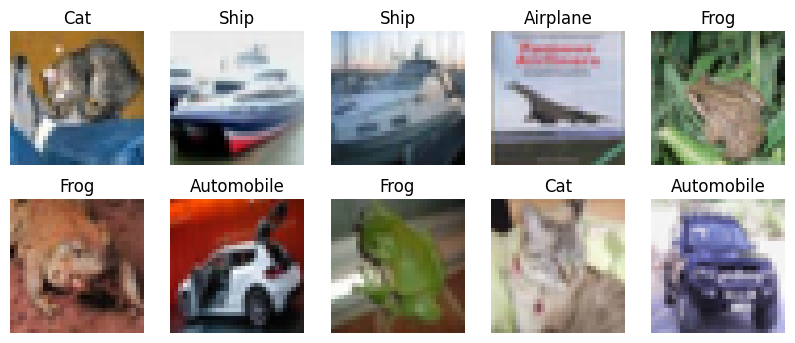

In [ ]:
plot_images(test_images, test_labels, cifar_10)

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



In [ ]:
# Step 5: Define Model Architecture
model = models.Sequential()

#Layer 1
from tensorflow.keras.regularizers import l2

# Create the model
model = models.Sequential()

# Regularization factor
l2_reg = 0.00001

# Dropout rate
dropout_rate = 0.3

# Convolutional layer for extracting certain features
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(l2_reg)))
model.add(layers.Dropout(dropout_rate))

# Max pooling layer reduces spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))

# Another convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2_reg)))
model.add(layers.Dropout(dropout_rate))

# Another max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Another convolutional layer
#model.add(layers.Conv2D(164, (3, 3), activation='relu', kernel_regularizer=l2(l2_reg)))
#model.add(layers.Dropout(dropout_rate))



In [ ]:
# Flattening layer transforming 2D data into 1D array
model.add(layers.Flatten())

# Fully connected layer
#model.add(layers.Dense(256, activation='relu', kernel_regularizer=l2(l2_reg)))
#model.add(layers.Dropout(dropout_rate))

# Another fully connected layer
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(l2_reg)))
model.add(layers.Dropout(dropout_rate))

# Fully connected layer
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(l2_reg)))
model.add(layers.Dropout(dropout_rate))

# Output layer
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=l2(l2_reg)))


In [ ]:
# Step 6: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:


history = model.fit(
    train_images,
    train_labels,
    epochs=60,
    validation_data=(test_images, test_labels),
)

Epoch 1/60
1563/1563 [==============================] - 18s 7ms/step - loss: 1.6261 - accuracy: 0.4047 - val_loss: 1.4133 - val_accuracy: 0.5231
Epoch 2/60
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2879 - accuracy: 0.5507 - val_loss: 1.2104 - val_accuracy: 0.6066
Epoch 3/60
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1591 - accuracy: 0.6004 - val_loss: 1.0495 - val_accuracy: 0.6607
Epoch 4/60
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0744 - accuracy: 0.6354 - val_loss: 1.0137 - val_accuracy: 0.6754
Epoch 5/60
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0062 - accuracy: 0.6612 - val_loss: 1.0125 - val_accuracy: 0.6768
Epoch 6/60
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9602 - accuracy: 0.6781 - val_loss: 0.9245 - val_accuracy: 0.6966
Epoch 7/60
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9136 - accuracy: 0.6939 - val_loss: 0.9331 - val_acc

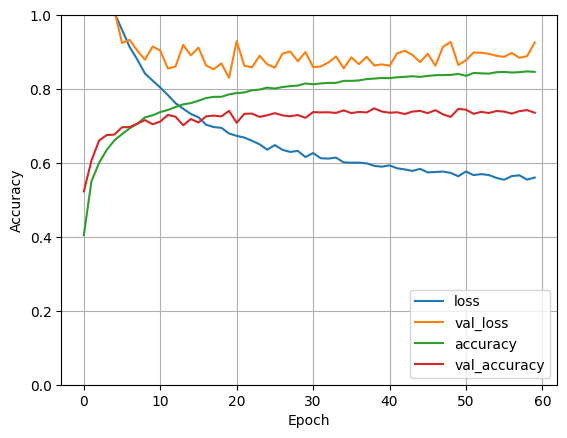

In [ ]:
# Step 8: Evaluate Model Performance
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')



In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)


313/313 - 1s - loss: 0.9260 - accuracy: 0.7358 - 799ms/epoch - 3ms/step
0.73580002784729


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image



In [ ]:

import numpy as np

# Predict the values from the test dataset
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)



313/313 [==============================] - 1s 3ms/step


In [ ]:
test_labels_classes = test_labels.squeeze()




In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(test_labels_classes, test_predictions_classes)



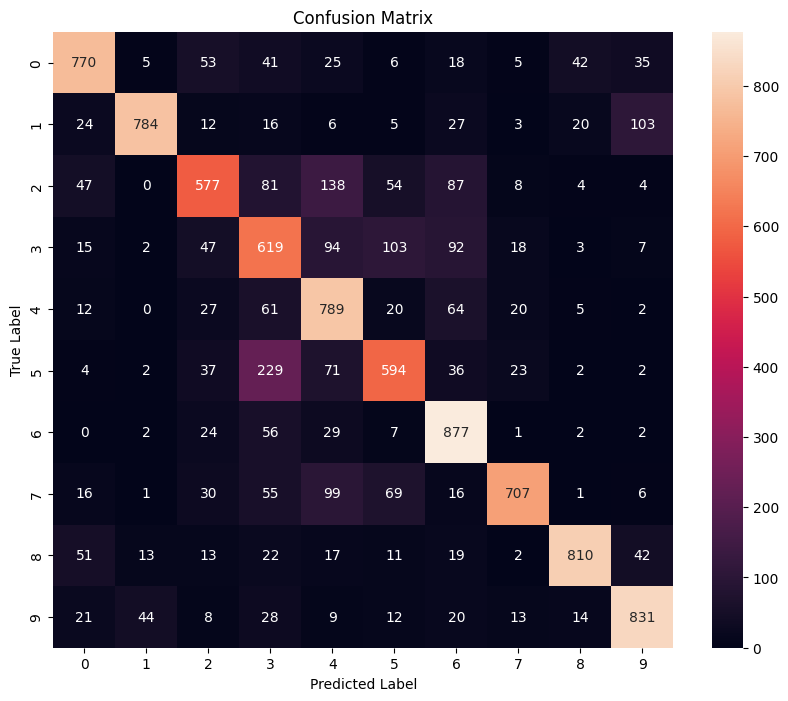

In [ ]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Step 9: Model Improvement and Fine-Tuning
# Based on the performance, you may decide to adjust the model architecture or hyperparameters

# Step 10: Save and Deploy the Model
model.save('my_cifar10_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

from google.colab import files
uploaded = files.upload()



Saving frog1.jpg to frog1.jpg


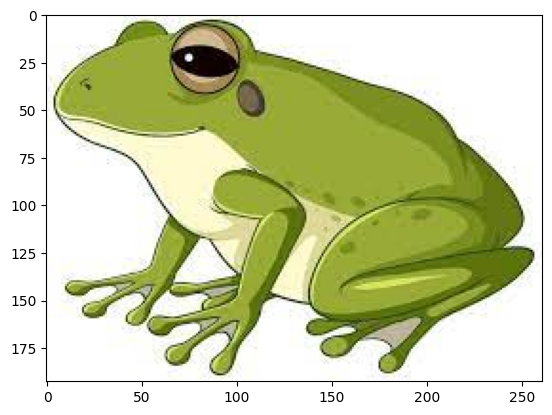

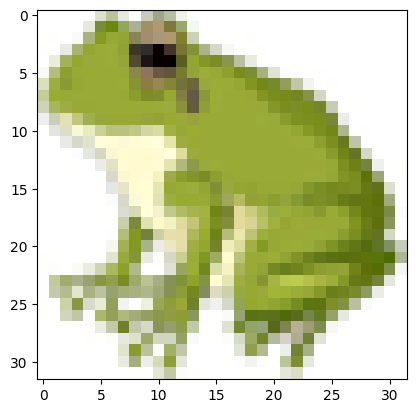

In [ ]:
# Assuming you uploaded a single file named 'my_image.jpg'
img_path = 'frog1.jpg'

img = image.load_img(img_path)  # Load the original image

plt.imshow(img)  # Display the original image
plt.show()

# Continue with preprocessing after displaying
img = img.resize((32, 32))  # Resize for the model

plt.imshow(img)  # Display the original image
plt.show()

# Convert the image to a numpy array and normalize it
img_array = image.img_to_array(img) / 255.0

# Add an extra dimension to the array (for batch size)
img_array = np.expand_dims(img_array, axis=0)



In [ ]:
predictions = model.predict_on_batch(img_array)


In [ ]:
predicted_class = np.argmax(predictions[0])
print("Predicted class:", predicted_class)
print("Image is ", cifar_10[predicted_class])

Predicted class: 6
Image is  Frog


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
from tensorflow.keras.preprocessing import image

<IPython.core.display.Javascript object>

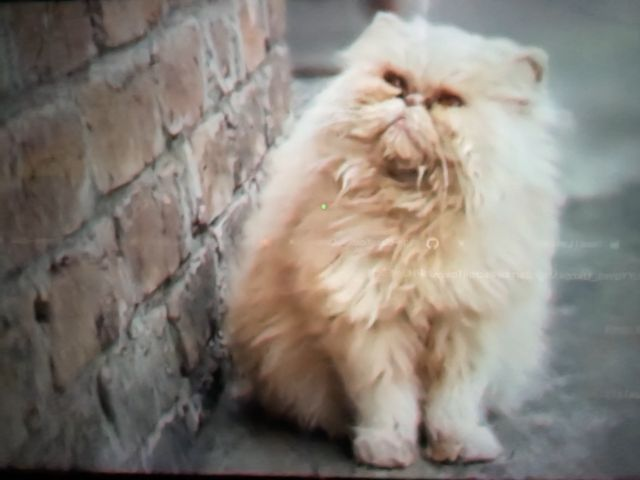

In [ ]:


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Take a photo with the webcam
image_path = take_photo()

# Show the image
from PIL import Image
from IPython.display import Image as IPImage
display(IPImage(image_path))


In [ ]:
# Preprocess the image
img = Image.open(image_path)
img = img.resize((32, 32))
img_array = np.array(img) / 255.0
img_array = img_array.reshape((320, 320, 3))

plt.imshow(img)  # Display the original image
plt.show()
# Predict
predictions = model.predict_on_batch(img_array)

predicted_class = np.argmax(predictions[0])
print("Predicted class:", predicted_class)
print("Image is ", cifar_10[predicted_class])

NameError: name 'Image' is not defined